<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Pie Charts**


Estimated time needed: **30** minutes


- In this lab, you will focus on visualizing data.

- The provided dataset will be loaded into pandas for analysis.

- Various pie charts will be created to:
   - Analyze developer preferences.
  
   - Identify technology usage trends.
    
- The lab aims to provide insights into key variables using visual representations.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


## Setup: Downloading and Loading the Data
**Install the libraries**


In [1]:
!pip install pandas

In [2]:
!pip install matplotlib

**Download and Load the Data**


To start, download and load the dataset into a `pandas` DataFrame.



In [3]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Step 2: Import necessary libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows to understand the structure of the data
df.head()


--2025-07-13 17:03:36--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  46.6MB/s    in 3.2s    

2025-07-13 17:03:39 (47.0 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Visualizing Data Composition with Pie Charts


##### 1.1 Create a Pie Chart of the Top 5 Databases Respondents Want to Work With


In the survey data, the `DatabaseWantToWorkWith` column lists the databases that respondents wish to work with. Let’s visualize the top 5 most-desired databases in a pie chart.



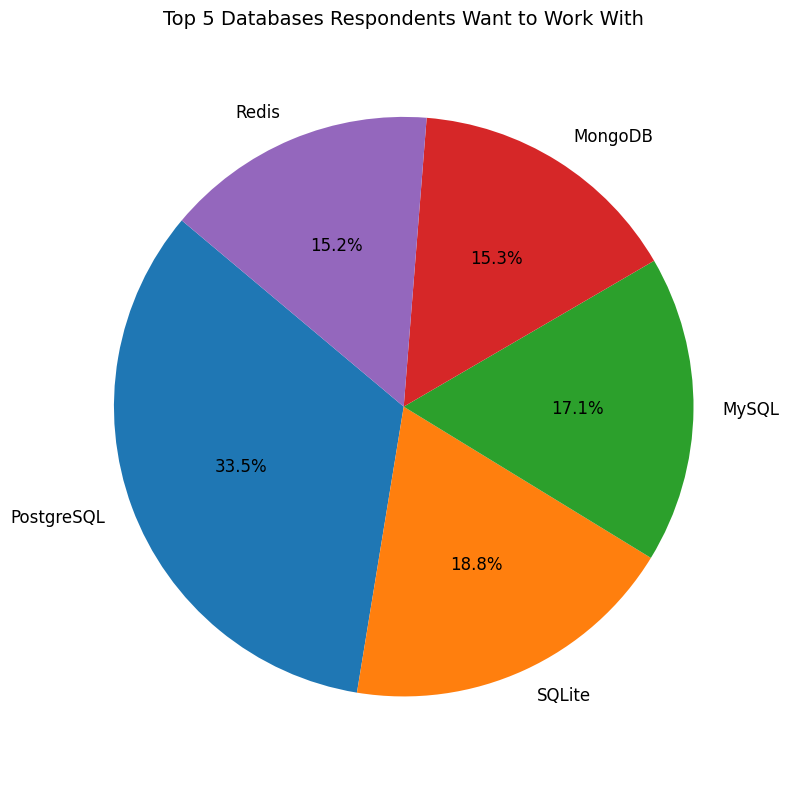

In [4]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

# Step 1: Connect to the database
conn = sqlite3.connect("survey-data.sqlite")

# Step 2: Query the relevant column
query = """
SELECT DatabaseWantToWorkWith 
FROM main 
WHERE DatabaseWantToWorkWith IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Step 3: Split multiple entries and explode into rows
df["DatabaseWantToWorkWith"] = df["DatabaseWantToWorkWith"].str.split(";")
df = df.explode("DatabaseWantToWorkWith")
df["DatabaseWantToWorkWith"] = df["DatabaseWantToWorkWith"].str.strip()

# Step 4: Count frequencies
top5 = df["DatabaseWantToWorkWith"].value_counts().nlargest(5)

# Step 5: Plot as pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    top5,
    labels=top5.index,
    autopct="%1.1f%%",
    startangle=140,
    textprops={'fontsize': 12}
)
plt.title("Top 5 Databases Respondents Want to Work With", fontsize=14)
plt.axis("equal")  # Makes the pie a circle
plt.tight_layout()
plt.show()


The `DevType` column lists the developer types for respondents. We’ll examine the distribution by showing the top 5 developer roles in a pie chart.



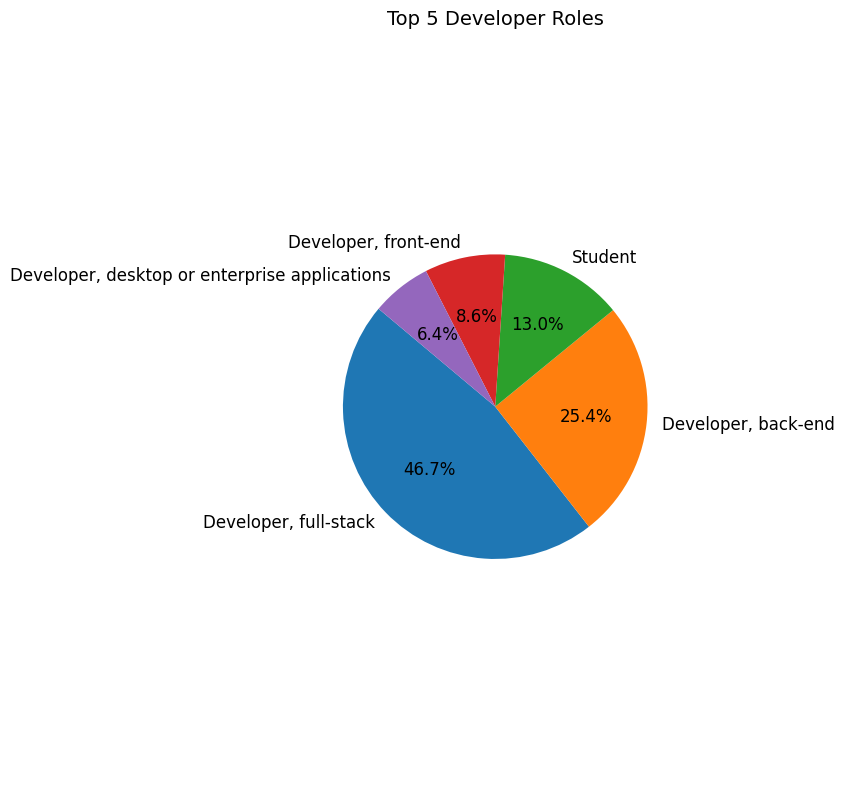

In [5]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

# Step 1: Connect to the SQLite database
conn = sqlite3.connect("survey-data.sqlite")

# Step 2: Query the DevType column
query = """
SELECT DevType
FROM main
WHERE DevType IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Step 3: Split multiple entries and explode into individual rows
df["DevType"] = df["DevType"].str.split(";")
df = df.explode("DevType")
df["DevType"] = df["DevType"].str.strip()

# Step 4: Count the top 5 developer roles
top5 = df["DevType"].value_counts().nlargest(5)

# Step 5: Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    top5,
    labels=top5.index,
    autopct="%1.1f%%",
    startangle=140,
    textprops={'fontsize': 12}
)
plt.title("Top 5 Developer Roles", fontsize=14)
plt.axis("equal")  # Keeps pie chart circular
plt.tight_layout()
plt.show()


##### 1.3 Create a pie chart for the operating systems used by respondents for professional use


The `OpSysProfessional` use column shows the operating systems developers use professionally. Let’s visualize the distribution of the top operating systems in a pie chart.



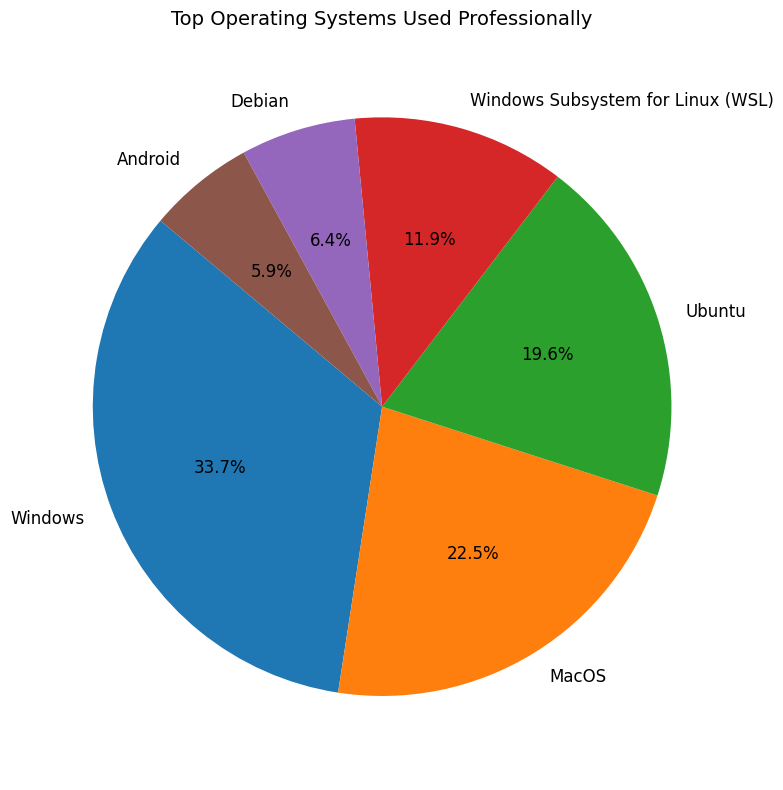

In [6]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

# Step 1: Connect to the SQLite database
conn = sqlite3.connect("survey-data.sqlite")

# Step 2: Query the OpSysProfessional use column
query = """
SELECT "OpSysProfessional use"
FROM main
WHERE "OpSysProfessional use" IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Step 3: Split multiple OSs if they exist (some may use more than one OS)
df["OpSysProfessional use"] = df["OpSysProfessional use"].str.split(";")
df = df.explode("OpSysProfessional use")
df["OpSysProfessional use"] = df["OpSysProfessional use"].str.strip()

# Step 4: Count the most common OSs
os_counts = df["OpSysProfessional use"].value_counts()

# Optional: Limit to top 5 or top 6 OSs (you can customize this)
top_os = os_counts.nlargest(6)

# Step 5: Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    top_os,
    labels=top_os.index,
    autopct="%1.1f%%",
    startangle=140,
    textprops={'fontsize': 12}
)
plt.title("Top Operating Systems Used Professionally", fontsize=14)
plt.axis("equal")  # Ensures pie chart is circular
plt.tight_layout()
plt.show()


### Task 2: Additional Visualizations and Comparisons


##### 2.1 Pie Chart for Top 5 Programming Languages Respondents Have Worked With


The `LanguageHaveWorkedWith` column contains the programming languages that respondents have experience with. We’ll plot a pie chart to display the composition of the top 5 languages.



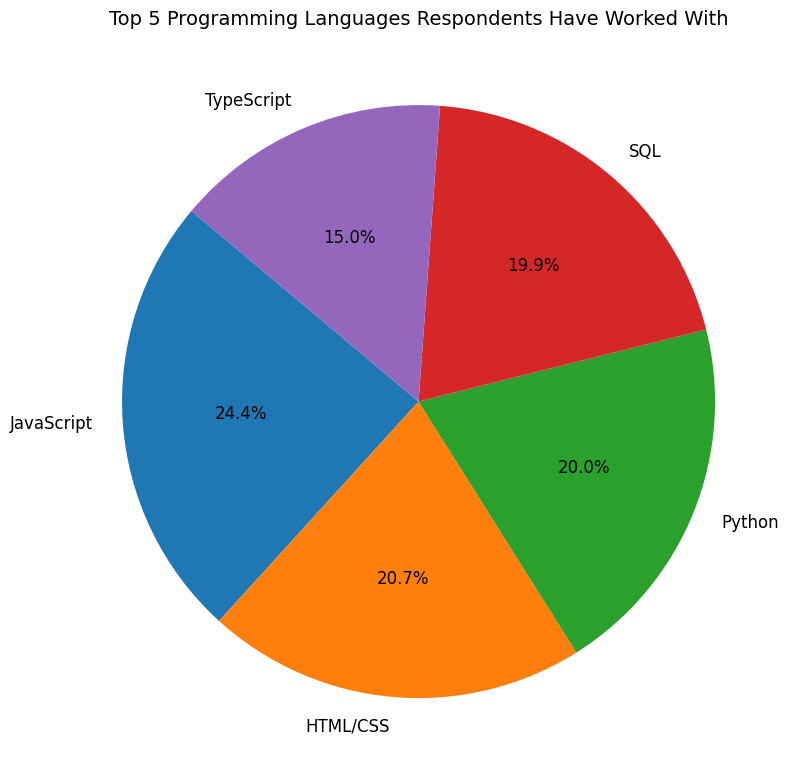

In [7]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

# Step 1: Connect to SQLite database
conn = sqlite3.connect("survey-data.sqlite")

# Step 2: Query the LanguageHaveWorkedWith column
query = """
SELECT LanguageHaveWorkedWith
FROM main
WHERE LanguageHaveWorkedWith IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Step 3: Split entries and clean
df["LanguageHaveWorkedWith"] = df["LanguageHaveWorkedWith"].str.split(";")
df = df.explode("LanguageHaveWorkedWith")
df["LanguageHaveWorkedWith"] = df["LanguageHaveWorkedWith"].str.strip()

# Step 4: Count the top 5 languages
language_counts = df["LanguageHaveWorkedWith"].value_counts()
top_languages = language_counts.nlargest(5)

# Step 5: Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    top_languages,
    labels=top_languages.index,
    autopct="%1.1f%%",
    startangle=140,
    textprops={'fontsize': 12}
)
plt.title("Top 5 Programming Languages Respondents Have Worked With", fontsize=14)
plt.axis("equal")
plt.tight_layout()
plt.show()


##### 2.2 Pie Chart for Top Collaboration Tools used in Professional Use


Using the `NEWCollabToolsHaveWorkedWith` column, we’ll identify and visualize the top collaboration tools respondents use in their professional work.



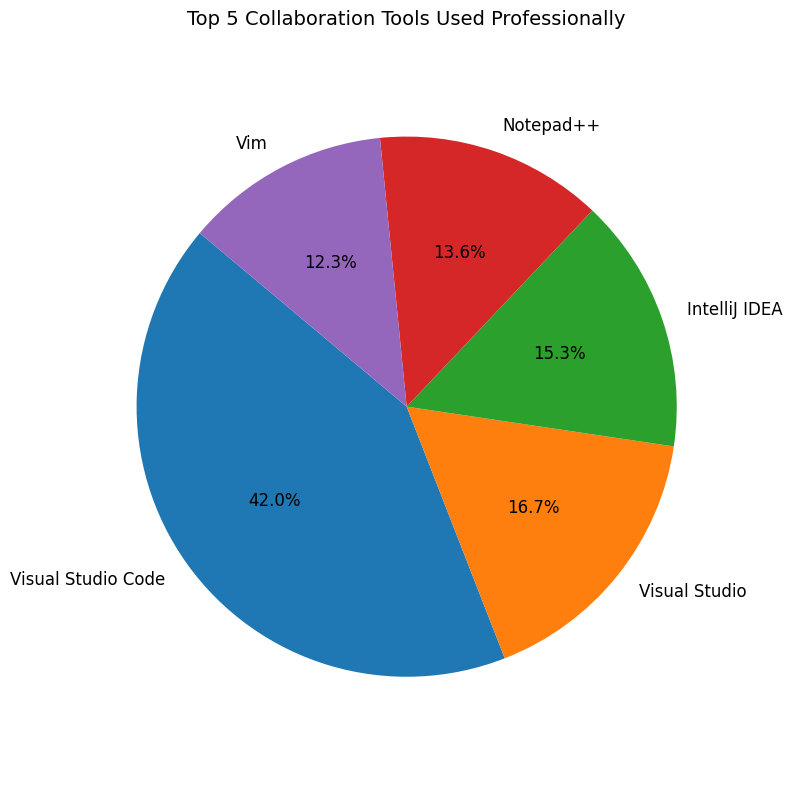

In [8]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

# Step 1: Connect to the SQLite database
conn = sqlite3.connect("survey-data.sqlite")

# Step 2: Query the NEWCollabToolsHaveWorkedWith column
query = """
SELECT NEWCollabToolsHaveWorkedWith
FROM main
WHERE NEWCollabToolsHaveWorkedWith IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Step 3: Split and clean the tools data
df["NEWCollabToolsHaveWorkedWith"] = df["NEWCollabToolsHaveWorkedWith"].str.split(";")
df = df.explode("NEWCollabToolsHaveWorkedWith")
df["NEWCollabToolsHaveWorkedWith"] = df["NEWCollabToolsHaveWorkedWith"].str.strip()

# Step 4: Get the top 5 collaboration tools
tool_counts = df["NEWCollabToolsHaveWorkedWith"].value_counts()
top_tools = tool_counts.nlargest(5)

# Step 5: Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    top_tools,
    labels=top_tools.index,
    autopct="%1.1f%%",
    startangle=140,
    textprops={'fontsize': 12}
)
plt.title("Top 5 Collaboration Tools Used Professionally", fontsize=14)
plt.axis("equal")
plt.tight_layout()
plt.show()


### Task 3: Analyzing and Interpreting Composition


In this task, you will create additional pie charts to analyze specific aspects of the survey data. Use `pandas` and `matplotlib` to complete each task and interpret the findings.



##### 3.1 Pie Chart of `Respondents` Most Admired Programming Languages


The `LanguageAdmired` column lists the programming languages respondents admire most. Create a pie chart to visualize the top 5 admired languages.



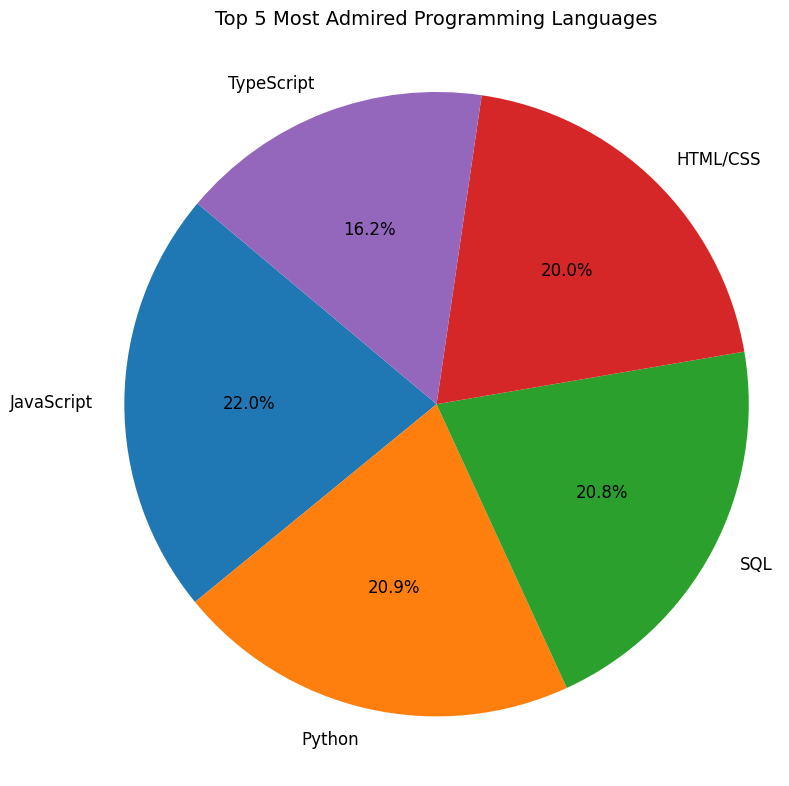

In [9]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

# Step 1: Connect to the database
conn = sqlite3.connect("survey-data.sqlite")

# Step 2: Query LanguageAdmired column
query = """
SELECT LanguageAdmired
FROM main
WHERE LanguageAdmired IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Step 3: Split multiple languages (separated by ";")
df["LanguageAdmired"] = df["LanguageAdmired"].str.split(";")
df = df.explode("LanguageAdmired")
df["LanguageAdmired"] = df["LanguageAdmired"].str.strip()

# Step 4: Count the occurrences and get the top 5
language_counts = df["LanguageAdmired"].value_counts()
top_languages = language_counts.nlargest(5)

# Step 5: Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    top_languages,
    labels=top_languages.index,
    autopct="%1.1f%%",
    startangle=140,
    textprops={'fontsize': 12}
)
plt.title("Top 5 Most Admired Programming Languages", fontsize=14)
plt.axis("equal")
plt.tight_layout()
plt.show()


##### 3.2 Pie Chart of Tools Used for AI Development


Using the `AIToolCurrently` Using column, create a pie chart to visualize the top 5 tools developers are currently using for AI development.



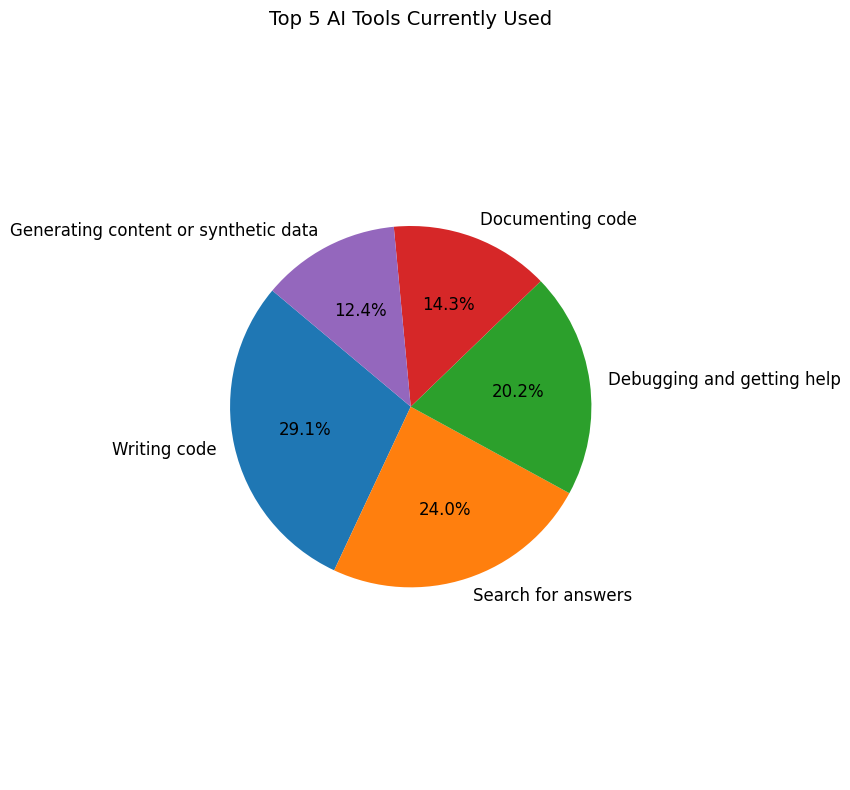

In [10]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

# Step 1: Connect to the SQLite database
conn = sqlite3.connect("survey-data.sqlite")

# Step 2: Load AIToolCurrently Using data
query = """
SELECT "AIToolCurrently Using"
FROM main
WHERE "AIToolCurrently Using" IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Step 3: Clean and split multi-value rows
df["AIToolCurrently Using"] = df["AIToolCurrently Using"].str.split(";")
df = df.explode("AIToolCurrently Using")
df["AIToolCurrently Using"] = df["AIToolCurrently Using"].str.strip()

# Step 4: Count and get top 5 tools
top_ai_tools = df["AIToolCurrently Using"].value_counts().nlargest(5)

# Step 5: Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    top_ai_tools,
    labels=top_ai_tools.index,
    autopct='%1.1f%%',
    startangle=140,
    textprops={'fontsize': 12}
)
plt.title("Top 5 AI Tools Currently Used", fontsize=14)
plt.axis('equal')
plt.tight_layout()
plt.show()


##### 3.3 Pie Chart for Preferred Web Frameworks


The `WebframeWantToWorkWith` column includes web frameworks that respondents are interested in working with. Visualize the top 5 frameworks in a pie chart.



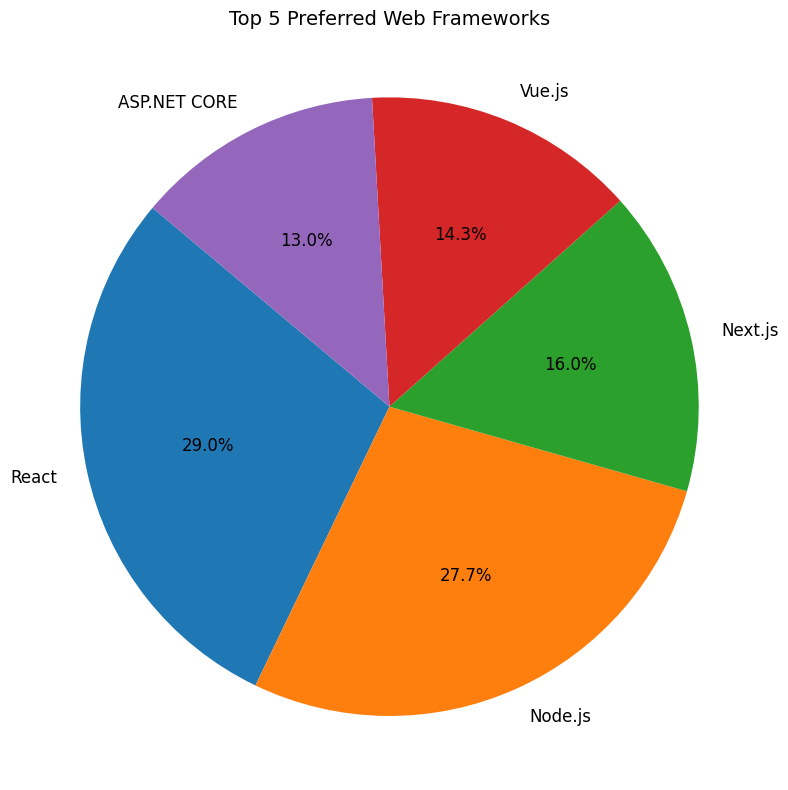

In [11]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

# Step 1: Connect to the SQLite database
conn = sqlite3.connect("survey-data.sqlite")

# Step 2: Query WebframeWantToWorkWith column
query = """
SELECT WebframeWantToWorkWith
FROM main
WHERE WebframeWantToWorkWith IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Step 3: Split and clean multi-valued entries
df["WebframeWantToWorkWith"] = df["WebframeWantToWorkWith"].str.split(";")
df = df.explode("WebframeWantToWorkWith")
df["WebframeWantToWorkWith"] = df["WebframeWantToWorkWith"].str.strip()

# Step 4: Count and get top 5 frameworks
top_frameworks = df["WebframeWantToWorkWith"].value_counts().nlargest(5)

# Step 5: Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    top_frameworks,
    labels=top_frameworks.index,
    autopct='%1.1f%%',
    startangle=140,
    textprops={'fontsize': 12}
)
plt.title("Top 5 Preferred Web Frameworks", fontsize=14)
plt.axis('equal')
plt.tight_layout()
plt.show()


##### 3.4 Pie Chart for Most Desired Embedded Technologies


Using the `EmbeddedWantToWorkWith` column, create a pie chart to show the top 5 most desired embedded technologies that respondents wish to work with.



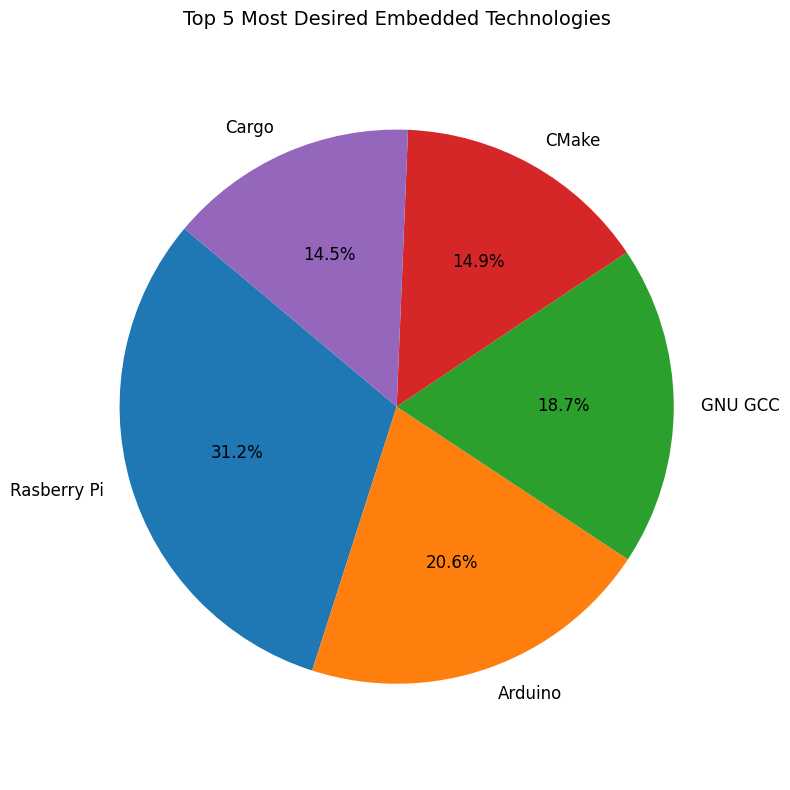

In [12]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

# Step 1: Connect to the SQLite database
conn = sqlite3.connect("survey-data.sqlite")

# Step 2: Query the EmbeddedWantToWorkWith column
query = """
SELECT EmbeddedWantToWorkWith
FROM main
WHERE EmbeddedWantToWorkWith IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Step 3: Split multi-valued strings and clean up whitespace
df["EmbeddedWantToWorkWith"] = df["EmbeddedWantToWorkWith"].str.split(";")
df = df.explode("EmbeddedWantToWorkWith")
df["EmbeddedWantToWorkWith"] = df["EmbeddedWantToWorkWith"].str.strip()

# Step 4: Count and select top 5 desired embedded technologies
top_embedded = df["EmbeddedWantToWorkWith"].value_counts().nlargest(5)

# Step 5: Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    top_embedded,
    labels=top_embedded.index,
    autopct="%1.1f%%",
    startangle=140,
    textprops={"fontsize": 12}
)
plt.title("Top 5 Most Desired Embedded Technologies", fontsize=14)
plt.axis("equal")
plt.tight_layout()
plt.show()


### Summary


After completing this lab, you will be able to:
- Create pie charts to visualize developer preferences across databases, programming languages, AI tools, and cloud platforms.
- Identify trends in technology usage, role distribution, and tool adoption through pie charts.
- Analyze and compare data composition across various categories to gain insights into developer preferences.




## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
